In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [23]:
data = pd.read_csv("Training_dataset.csv")
data['Result'] = data['Result'].map({-1:0, 1:1}) 

In [24]:
top_features = [
"Prefix_Suffix",
"having_Sub_Domain",
"SSLfinal_State",
"Domain_registeration_length",
"URL_of_Anchor",
"Links_in_tags",
"SFH",
"age_of_domain",
"web_traffic",
"Page_Rank",
"Links_pointing_to_page"
]


In [25]:
inputs = data[top_features]

outputs = data.iloc[:, -1]

In [26]:
input_train, input_test, output_train, output_test = train_test_split(inputs, outputs, test_size=0.3, random_state=1)

In [27]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(input_train, output_train)

#Predict the response for test dataset
output_pred = clf.predict(input_test)

In [28]:
print("Accuracy:",metrics.accuracy_score(output_test, output_pred))

Accuracy: 0.9020198974977389


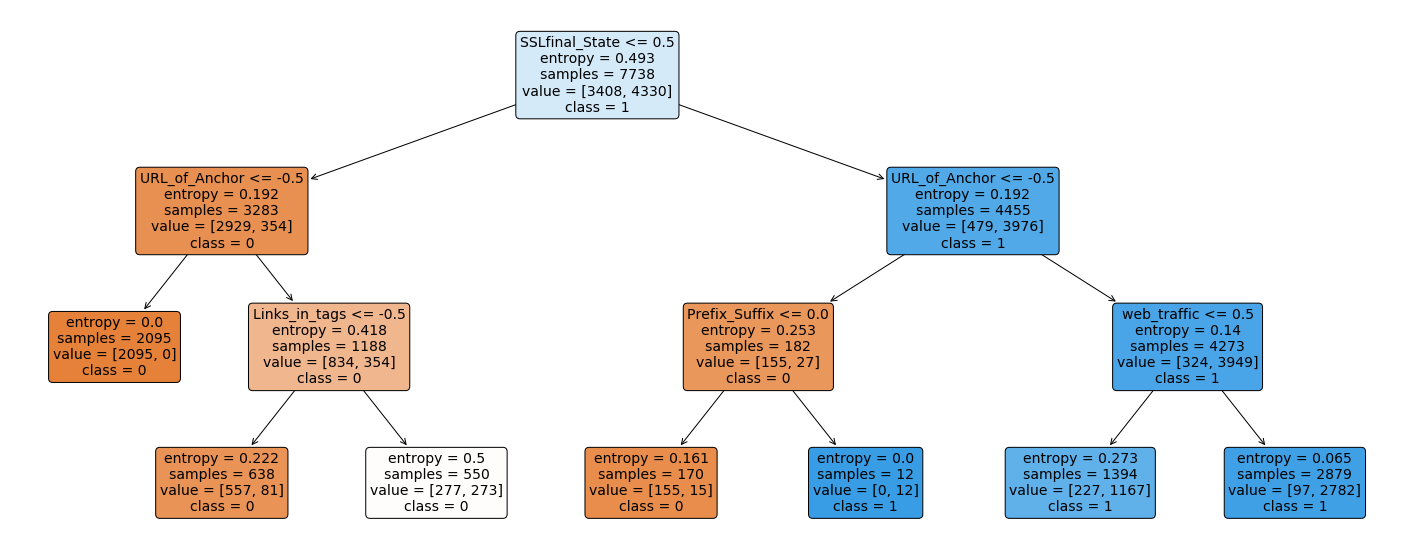

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=top_features, 
              class_names=['0', '1'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(output_test, output_pred))
print(classification_report(output_test, output_pred))

[[1341  149]
 [ 176 1651]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1490
           1       0.92      0.90      0.91      1827

    accuracy                           0.90      3317
   macro avg       0.90      0.90      0.90      3317
weighted avg       0.90      0.90      0.90      3317

